# Preparing the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip'

!wget "https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip" -O dataset.zip


--2025-04-13 16:19:51--  https://synthetichealth.github.io/synthea-sample-data/downloads/latest/synthea_sample_data_csv_latest.zip
Resolving synthetichealth.github.io (synthetichealth.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to synthetichealth.github.io (synthetichealth.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7991968 (7.6M) [application/zip]
Saving to: ‘dataset.zip’

dataset.zip         100%[===================>]   7.62M  45.4MB/s    in 0.2s    

2025-04-13 16:19:51 (45.4 MB/s) - ‘dataset.zip’ saved [7991968/7991968]



In [3]:
import zipfile
import os

zip_path = "dataset.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)


['patients.csv',
 'observations.csv',
 'medications.csv',
 'encounters.csv',
 'allergies.csv',
 'providers.csv',
 'claims_transactions.csv',
 'careplans.csv',
 'immunizations.csv',
 'payers.csv',
 'organizations.csv',
 'payer_transitions.csv',
 'devices.csv',
 'conditions.csv',
 'imaging_studies.csv',
 'supplies.csv',
 'procedures.csv',
 'claims.csv']

In [4]:
csv_files = [file for file in os.listdir(extract_path) if file.endswith(".csv")]

dataframes = {file: pd.read_csv(os.path.join(extract_path, file)) for file in csv_files}

for filename, df in dataframes.items():
    print(f" FILE {filename} - SHAPE: {df.shape}")
    display(df.head(3))  # Show first 3 rows


 FILE patients.csv - SHAPE: (106, 28)


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,1994-02-06,NaN,999-52-8591,S99996852,X47758697X,Mr.,Joshua658,Alvin56,Kunde533,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.211142,-71.045802,56904.96,18019.99,100511
1,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,1968-08-06,2009-12-11,999-75-3953,S99993577,X28173268X,Mr.,Bennie663,NaN,Ebert178,...,Braintree,Massachusetts,Norfolk County,25021.0,2184,42.255420,-70.971016,124024.12,1075.06,49737
2,7179458e-d6e3-c723-2530-d4acfe1c2668,2008-12-21,NaN,999-70-1925,NaN,NaN,NaN,Hunter736,Mckinley734,Gerlach374,...,Mattapoisett,Massachusetts,Plymouth County,NaN,0,41.648292,-70.850619,45645.06,6154.94,133816


 FILE observations.csv - SHAPE: (86360, 9)


,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,8302-2,Body Height,176.1,cm,numeric
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,vital-signs,29463-7,Body Weight,86.4,kg,numeric


 FILE medications.csv - SHAPE: (5605, 13)


,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T11:02:48Z,2015-10-15T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,857005,Acetaminophen 325 MG / HYDROcodone Bitartrate ...,2.51,0.0,1,2.51,NaN,NaN
1,2015-09-28T11:02:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,d31fccc3-1767-390d-966a-22a5156f4219,953c5138-ce17-4084-3432-1ac23f184528,310965,Ibuprofen 200 MG Oral Tablet,365.90,0.0,1,365.90,NaN,NaN
2,2005-11-08T20:24:07Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,e03e23c9-4df1-3eb6-a62d-f70f02301496,d1cea2e5-1735-089f-c72f-22ad16976663,310325,ferrous sulfate 325 MG Oral Tablet,0.15,0.0,50,7.50,NaN,NaN


 FILE encounters.csv - SHAPE: (7049, 15)


,Id,START,STOP,PATIENT,ORGANIZATION,PROVIDER,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,294d0dab-907e-8fce-7a47-0c0d322a5734,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,1567.00,87.2,NaN,NaN
1,2ccec874-cbaa-e280-7abb-f2bc2b603961,2013-04-07T09:04:48Z,2013-04-07T09:55:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.80,704.20,0.0,NaN,NaN
2,953c5138-ce17-4084-3432-1ac23f184528,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,db106514-f254-3402-b6a4-6d210c78c7e2,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,emergency,50849002,Emergency room admission (procedure),146.18,1008.98,0.0,125605004.0,Fracture of bone (disorder)


 FILE allergies.csv - SHAPE: (92, 15)


,START,STOP,PATIENT,ENCOUNTER,CODE,SYSTEM,DESCRIPTION,TYPE,CATEGORY,REACTION1,DESCRIPTION1,SEVERITY1,REACTION2,DESCRIPTION2,SEVERITY2
0,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,419199007,SNOMED-CT,Allergy to substance (finding),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,84489001,SNOMED-CT,Mold (organism),allergy,environment,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-07-26,NaN,4569671e-ed39-055f-8e78-422b96c9896b,f5242c34-8841-269a-50c5-c6f623575955,264287008,SNOMED-CT,Animal dander (substance),allergy,environment,878820003.0,Rhinoconjunctivitis (disorder),MODERATE,247472004.0,Wheal (finding),MILD


 FILE providers.csv - SHAPE: (272, 13)


,Id,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE,ZIP,LAT,LON,ENCOUNTERS,PROCEDURES
0,22d80c8d-fb8f-322d-9753-22002b043474,74ab949d-17ac-3309-83a0-13b4405c66aa,Ted955 Reilly981,M,GENERAL PRACTICE,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,66,0
1,76781d9f-6cd0-30f2-81b3-359fad974235,faffaf6a-ee1a-3673-b0b0-421a9c249244,Gustavo235 Armstrong51,M,GENERAL PRACTICE,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,34,0
2,5fca6a38-55af-324f-835b-0eb5837afc1c,17a4bae5-8b64-34d7-8144-b428be027bd0,Isabela97 Solorio55,F,GENERAL PRACTICE,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5,0


 FILE claims_transactions.csv - SHAPE: (111602, 33)


,ID,CLAIMID,CHARGEID,PATIENTID,TYPE,AMOUNT,METHOD,FROMDATE,TODATE,PLACEOFSERVICE,...,PAYMENTS,ADJUSTMENTS,TRANSFERS,OUTSTANDING,APPOINTMENTID,LINENOTE,PATIENTINSURANCEID,FEESCHEDULEID,PROVIDERID,SUPERVISINGPROVIDERID
0,ea4e815f-ce9f-2abc-6dc8-b65d49d90abf,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,0,30a6452c-4297-a1ac-977a-6a23237c7b46,CHARGE,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,NaN,0.0,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
1,d49d02bf-9d41-5579-db91-6cba93b5157e,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,1,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFEROUT,NaN,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024
2,a93a057f-3a85-aaf3-b722-d975276d2afd,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,2,30a6452c-4297-a1ac-977a-6a23237c7b46,TRANSFERIN,136.8,NaN,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,f2068cee-c75c-321d-9b2c-c33535db89c9,...,0.0,0.0,136.8,136.8,294d0dab-907e-8fce-7a47-0c0d322a5734,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,1,c3d07214-c20f-3f33-ad41-0e55adf5b024,c3d07214-c20f-3f33-ad41-0e55adf5b024


 FILE careplans.csv - SHAPE: (329, 9)


,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,47441dae-e581-6d99-e5fc-b7fbd9cde7fe,2015-09-28,2015-10-31,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,385691007,Fracture care (regime/therapy),359817006.0,Closed fracture of hip (disorder)
1,131c18a3-d324-663f-2f4a-d3ff0f6c26d6,1996-10-22,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,735985000,Diabetes self management plan (record artifact),714628002.0,Prediabetes (finding)
2,21ffb15e-179c-d330-70f0-0ebc59b1cdb9,2020-10-30,2020-11-20,30a6452c-4297-a1ac-977a-6a23237c7b46,794baa15-fe5e-c061-e188-ad59022aeea5,773513001,Physiotherapy care plan (record artifact),44465007.0,Sprain of ankle (disorder)


 FILE immunizations.csv - SHAPE: (1619, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST
0,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,140,Influenza seasonal injectable preservative ...,136.0
1,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,113,Td (adult) 5 Lf tetanus toxoid preservative ...,136.0
2,2016-04-10T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,43,Hep B adult,136.0


 FILE payers.csv - SHAPE: (10, 22)


,Id,NAME,OWNERSHIP,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE,AMOUNT_COVERED,AMOUNT_UNCOVERED,...,UNCOVERED_ENCOUNTERS,COVERED_MEDICATIONS,UNCOVERED_MEDICATIONS,COVERED_PROCEDURES,UNCOVERED_PROCEDURES,COVERED_IMMUNIZATIONS,UNCOVERED_IMMUNIZATIONS,UNIQUE_CUSTOMERS,QOLS_AVG,MEMBER_MONTHS
0,a735bf55-83e9-331a-899d-a82a60b9f60c,Medicare,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,7816873.41,388769.54,...,0,3742,0,9155,0,546,0,30,0.692503,5532
1,df166300-5a78-3502-a46a-832842197811,Medicaid,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,8673985.13,192216.37,...,0,891,0,4990,0,886,0,44,0.939526,7092
2,d18ef2e6-ef40-324c-be54-34a5ee865625,Dual Eligible,GOVERNMENT,NaN,NaN,NaN,NaN,NaN,581647.09,7344.74,...,0,67,0,527,0,72,0,5,0.513418,864


 FILE organizations.csv - SHAPE: (272, 11)


,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE,REVENUE,UTILIZATION
0,74ab949d-17ac-3309-83a0-13b4405c66aa,Fitchburg Outpatient Clinic,881 Main Street,Fitchburg,MA,1420,42.586487,-71.805210,978-342-9781 Or 978-342-9781,0.0,66
1,faffaf6a-ee1a-3673-b0b0-421a9c249244,ACTIVATED BY WELLNESS LLC,66 WASHINGTON ST,STOUGHTON,MA,20722571,42.144158,-71.103783,6178719807,0.0,34
2,17a4bae5-8b64-34d7-8144-b428be027bd0,NURSE ON CALL,512 MAIN STREET SUITE 211,SHREWSBURY,MA,15456406,42.295110,-71.718085,5088451232,0.0,5


 FILE payer_transitions.csv - SHAPE: (1145, 8)


,PATIENT,MEMBERID,START_DATE,END_DATE,PAYER,SECONDARY_PAYER,PLAN_OWNERSHIP,OWNER_NAME
0,30a6452c-4297-a1ac-977a-6a23237c7b46,8c03da34-561e-4f25-6fe1-404bcbbd2d37,2013-02-10T09:04:48Z,2014-02-09T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
1,30a6452c-4297-a1ac-977a-6a23237c7b46,fcd3c5f5-229b-f6da-f9b1-57e9ccdd4227,2014-02-09T09:04:48Z,2015-02-08T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533
2,30a6452c-4297-a1ac-977a-6a23237c7b46,e7478da0-add2-e9ab-5fa7-5404bb14a93d,2015-02-08T09:04:48Z,2016-02-07T09:04:48Z,d31fccc3-1767-390d-966a-22a5156f4219,NaN,Self,Joshua658 Kunde533


 FILE devices.csv - SHAPE: (676, 7)


,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,UDI
0,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,228869008,Manual wheelchair (physical object),(01)74035126130039(11)150907(17)400921(10)7561...
1,2015-09-28T09:04:48Z,2015-10-31T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,705417005,Wheelchair accessory (physical object),(01)74178207044942(11)150907(17)400921(10)4565...
2,1996-10-22T19:07:21Z,NaN,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337414009,Blood glucose meter (physical object),(01)32229498379273(11)961001(17)211016(10)2817...


 FILE conditions.csv - SHAPE: (3876, 7)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,105531004,Housing unsatisfactory (finding)
1,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,224299000,Received higher education (finding)
2,2012-04-01,NaN,30a6452c-4297-a1ac-977a-6a23237c7b46,294d0dab-907e-8fce-7a47-0c0d322a5734,http://snomed.info/sct,266934004,Transport problem (finding)


 FILE imaging_studies.csv - SHAPE: (407, 13)


,Id,DATE,PATIENT,ENCOUNTER,SERIES_UID,BODYSITE_CODE,BODYSITE_DESCRIPTION,MODALITY_CODE,MODALITY_DESCRIPTION,INSTANCE_UID,SOP_CODE,SOP_DESCRIPTION,PROCEDURE_CODE
0,75c55607-6b95-b44b-f5a1-d3bf5432c23a,2015-09-28T09:04:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,1.2.840.99999999.1.89211462.1443431088265,12921003,Structure of pelvis (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.43566029.1443431088265,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,713021002
1,5e3b667c-2d48-0401-0434-34fd3e7cc267,2016-04-24T10:56:49Z,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,1.2.840.99999999.1.95156023.1461495409265,700016008,Structure of region of internal part of mouth ...,DX,Digital Radiography,1.2.840.99999999.1.1.67878918.1461495409265,1.2.840.10008.5.1.4.1.1.1.3,Digital Intra-Oral X-Ray Image Storage - For P...,241046008
2,ddaaa2df-5e1c-0ccf-cd2d-3215281e14ce,2015-09-14T18:02:09Z,7179458e-d6e3-c723-2530-d4acfe1c2668,ed8fc369-fd6a-5249-187c-690e5c4524ed,1.2.840.99999999.1.99948491.1442253729798,91609006,Bone structure of mandible (body structure),DX,Digital Radiography,1.2.840.99999999.1.1.83142373.1442253729798,1.2.840.10008.5.1.4.1.1.1.1,Digital X-Ray Image Storage,19589009


 FILE supplies.csv - SHAPE: (2688, 6)


,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,QUANTITY
0,2016-04-24,30a6452c-4297-a1ac-977a-6a23237c7b46,1617912a-d228-1f6c-ed9b-d8fb39ef0a32,277183007,Dental equipment (physical object),1
1,1996-10-22,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,cc632c61-54a0-35f6-be9f-879875d14c4f,337388004,Blood glucose testing strips (physical object),50
2,1999-10-26,34a4dcc4-35fb-6ad5-ab98-be285c586a4f,dd83e406-eae2-49dc-734e-06d34594f3df,337388004,Blood glucose testing strips (physical object),50


 FILE procedures.csv - SHAPE: (17784, 10)


,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2015-09-28T09:04:48Z,2015-09-28T09:34:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,713021002,Plain X-ray of pelvis (procedure),431.4,NaN,NaN
1,2015-09-28T09:04:48Z,2015-09-28T11:02:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,953c5138-ce17-4084-3432-1ac23f184528,http://snomed.info/sct,305428000,Admission to orthopedic department (procedure),431.4,359817006.0,Closed fracture of hip (disorder)
2,2016-04-10T09:04:48Z,2016-04-10T09:19:48Z,30a6452c-4297-a1ac-977a-6a23237c7b46,0b03e41b-06a6-66fa-b972-acc5a83b134a,http://snomed.info/sct,430193006,Medication reconciliation (procedure),852.4,NaN,NaN


 FILE claims.csv - SHAPE: (12654, 31)


,Id,PATIENTID,PROVIDERID,PRIMARYPATIENTINSURANCEID,SECONDARYPATIENTINSURANCEID,DEPARTMENTID,PATIENTDEPARTMENTID,DIAGNOSIS1,DIAGNOSIS2,DIAGNOSIS3,...,STATUS2,STATUSP,OUTSTANDING1,OUTSTANDING2,OUTSTANDINGP,LASTBILLEDDATE1,LASTBILLEDDATE2,LASTBILLEDDATEP,HEALTHCARECLAIMTYPEID1,HEALTHCARECLAIMTYPEID2
0,a4d9dd3b-4b3f-6afa-7aa4-07e5b1e28d8a,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,105531004,224299000.0,266934004.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,2012-04-01T10:02:47Z,1,1
1,f1eb9d4d-4370-3739-1321-80287b11d1e9,30a6452c-4297-a1ac-977a-6a23237c7b46,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,NaN,20,20,314529007,160903007.0,713458007.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,2013-04-07T09:55:49Z,1,1
2,8052e96e-df67-3cc4-21cf-cfc9fc909a4a,30a6452c-4297-a1ac-977a-6a23237c7b46,2c4b7d17-0ded-3e16-b5eb-6dda1d6a81bb,d31fccc3-1767-390d-966a-22a5156f4219,NaN,4,4,125605004,125605004.0,359817006.0,...,CLOSED,CLOSED,0.0,0.0,0.0,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2015-09-28T11:02:48Z,2,2


## Data PreProcessing

## Joining Tables

In [5]:
# loading the CSVs
patients = dataframes['patients.csv']
encounters = dataframes['encounters.csv']
conditions = dataframes['conditions.csv']
procedures = dataframes['procedures.csv']
medications = dataframes['medications.csv']
claims = dataframes['claims.csv']
observations = dataframes['observations.csv']

# rename columns to avoid conflicts before merging
patients = patients.rename(columns=lambda x: f"PATIENT_{x}" if x != "Id" else "PATIENT_ID")
encounters = encounters.rename(columns=lambda x: f"ENCOUNTER_{x}" if x != "Id" else "ENCOUNTER_ID")
conditions = conditions.rename(columns=lambda x: f"CONDITION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
procedures = procedures.rename(columns=lambda x: f"PROCEDURE_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
medications = medications.rename(columns=lambda x: f"MEDICATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")
claims = claims.rename(columns=lambda x: f"CLAIM_{x}" if x != "PATIENTID" else "PATIENT_ID")
observations = observations.rename(columns=lambda x: f"OBSERVATION_{x}" if x != "ENCOUNTER" else "ENCOUNTER_ID")

# merge Encounters with Patients
df = encounters.merge(patients, left_on='ENCOUNTER_PATIENT', right_on='PATIENT_ID', how='left')

# merge Conditions
df = df.merge(conditions, on='ENCOUNTER_ID', how='left')

# merge Procedures
df = df.merge(procedures, on='ENCOUNTER_ID', how='left')

# merge Medications
df = df.merge(medications, on='ENCOUNTER_ID', how='left')

# merge Observations
df = df.merge(observations, on='ENCOUNTER_ID', how='left')

# drop redundant ID cols
df.drop(columns=['PATIENT_ID', 'ENCOUNTER_ID'], errors='ignore', inplace=True)

print("Shape:", df.shape)
df.head()


Shape: (3887768, 76)


,ENCOUNTER_START,ENCOUNTER_STOP,ENCOUNTER_PATIENT,ENCOUNTER_ORGANIZATION,ENCOUNTER_PROVIDER,ENCOUNTER_PAYER,ENCOUNTER_ENCOUNTERCLASS,ENCOUNTER_CODE,ENCOUNTER_DESCRIPTION,ENCOUNTER_BASE_ENCOUNTER_COST,...,MEDICATION_REASONCODE,MEDICATION_REASONDESCRIPTION,OBSERVATION_DATE,OBSERVATION_PATIENT,OBSERVATION_CATEGORY,OBSERVATION_CODE,OBSERVATION_DESCRIPTION,OBSERVATION_VALUE,OBSERVATION_UNITS,OBSERVATION_TYPE
0,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-04-01T09:04:48Z,2012-04-01T10:02:47Z,30a6452c-4297-a1ac-977a-6a23237c7b46,f2068cee-c75c-321d-9b2c-c33535db89c9,c3d07214-c20f-3f33-ad41-0e55adf5b024,d31fccc3-1767-390d-966a-22a5156f4219,wellness,162673000,General examination of patient (procedure),136.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['ENCOUNTER_START', 'ENCOUNTER_STOP', 'ENCOUNTER_PATIENT',
       'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER',
       'ENCOUNTER_ENCOUNTERCLASS', 'ENCOUNTER_CODE', 'ENCOUNTER_DESCRIPTION',
       'ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST',
       'ENCOUNTER_PAYER_COVERAGE', 'ENCOUNTER_REASONCODE',
       'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_BIRTHDATE', 'PATIENT_DEATHDATE',
       'PATIENT_SSN', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT', 'PATIENT_PREFIX',
       'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX',
       'PATIENT_MAIDEN', 'PATIENT_MARITAL', 'PATIENT_RACE',
       'PATIENT_ETHNICITY', 'PATIENT_GENDER', 'PATIENT_BIRTHPLACE',
       'PATIENT_ADDRESS', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
       'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_LAT', 'PATIENT_LON',
       'PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE',
       'PATIENT_INCOME', 'CONDITION_START', 'CONDITION_STOP',
       'CONDITI

## Reducing dataframe

In [7]:
# initial drop just by looking at the columns

drop_cols = [
    'PATIENT_LAT', 'PATIENT_LON', 'PATIENT_DRIVERS', 'PATIENT_PASSPORT',
    'PATIENT_FIRST', 'PATIENT_MIDDLE', 'PATIENT_LAST', 'PATIENT_SUFFIX', 'PATIENT_MAIDEN',
    'ENCOUNTER_ORGANIZATION', 'ENCOUNTER_PROVIDER', 'ENCOUNTER_PAYER', 'MEDICATION_PAYER',
    'PATIENT_FIPS', 'PATIENT_ZIP', 'PATIENT_DEATHDATE'
]

df.drop(columns=drop_cols, inplace=True)
print("Shape:", df.shape)


Shape: (3887768, 60)


In [8]:
# which columns have the most null values

null_counts = df.isnull().sum()

null_counts_sorted = null_counts.sort_values(ascending=False)

print(null_counts_sorted)


ENCOUNTER_REASONCODE             2258582
ENCOUNTER_REASONDESCRIPTION      2258582
MEDICATION_REASONCODE            2215176
MEDICATION_REASONDESCRIPTION     2215176
PROCEDURE_REASONCODE             2147635
PROCEDURE_REASONDESCRIPTION      2147635
OBSERVATION_UNITS                 763563
CONDITION_STOP                    421622
CONDITION_SYSTEM                  223854
CONDITION_PATIENT                 223854
CONDITION_CODE                    223854
CONDITION_START                   223854
CONDITION_DESCRIPTION             223854
MEDICATION_STOP                   208918
MEDICATION_START                  152358
MEDICATION_BASE_COST              152358
MEDICATION_PAYER_COVERAGE         152358
MEDICATION_PATIENT                152358
MEDICATION_TOTALCOST              152358
MEDICATION_CODE                   152358
MEDICATION_DESCRIPTION            152358
MEDICATION_DISPENSES              152358
PATIENT_MARITAL                    70899
PROCEDURE_PATIENT                  21161
PROCEDURE_CODE  

In [9]:
# to datetime
date_cols = [
    'ENCOUNTER_START', 'ENCOUNTER_STOP', 'PATIENT_BIRTHDATE',
    'CONDITION_START', 'CONDITION_STOP', 'PROCEDURE_START',
    'PROCEDURE_STOP', 'MEDICATION_START', 'MEDICATION_STOP',
    'OBSERVATION_DATE'
]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# to category
category_cols = [
    'ENCOUNTER_PATIENT', 'CONDITION_PATIENT', 'PROCEDURE_PATIENT',
    'MEDICATION_PATIENT', 'OBSERVATION_PATIENT', 'ENCOUNTER_ENCOUNTERCLASS',
    'ENCOUNTER_DESCRIPTION', 'ENCOUNTER_REASONDESCRIPTION', 'PATIENT_PREFIX',
    'PATIENT_MARITAL', 'PATIENT_RACE', 'PATIENT_ETHNICITY', 'PATIENT_GENDER',
    'PATIENT_BIRTHPLACE', 'PATIENT_CITY', 'PATIENT_STATE', 'PATIENT_COUNTY',
    'CONDITION_SYSTEM', 'CONDITION_DESCRIPTION', 'PROCEDURE_SYSTEM',
    'PROCEDURE_DESCRIPTION', 'PROCEDURE_REASONDESCRIPTION',
    'MEDICATION_DESCRIPTION', 'MEDICATION_REASONDESCRIPTION',
    'OBSERVATION_CATEGORY', 'OBSERVATION_DESCRIPTION',
    'OBSERVATION_UNITS', 'OBSERVATION_TYPE'
]
for col in category_cols:
    df[col] = df[col].astype('category')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 60 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    object             
 13  PATIENT_PREFIX                 category   

In [11]:
df['OBSERVATION_CODE'] = df['OBSERVATION_CODE'].astype(str).str.replace('-', '')

In [12]:
df['OBSERVATION_CODE'].unique()

array(['nan', '83022', '725143', '294637', '391565', '84624', '84806',
       '88674', '92791', '66902', '7898', '7187', '45443', '7872', '7856',
       '7864', '210005', '7773', '322073', '326231', '721662', '765016',
       '930263', '930271', '930289', '930388', '930297', '930305',
       '930313', '635862', '764373', '678755', '825893', '567990',
       '930339', '718023', '635128', '548990', '930347', '930354',
       '326249', '560516', '702746', '765040', '557587', '826677',
       '83105', '45484', '23390', '62992', '384834', '497651', '29470',
       '62984', '20693', '205658', '20933', '25718', '182626', '20859',
       '756262', '205708', '694539', '595769', '892042', '756361',
       '27086', '57927', '25148', '58115', '58032', '58040', '58024',
       '57943', '57992', '58214', '139451', '57877', '241240', '82479',
       '57695', '6304', '776062', '82891', '98434', '337568', '579052',
       '921429', '921411', '921312', '921403', '921395', '921387',
       '921304', '921

In [13]:
df.replace('nan', np.nan, inplace=True)

In [14]:
df['OBSERVATION_CODE'] = pd.to_numeric(df['OBSERVATION_CODE'], errors='coerce')

In [15]:
df['OBSERVATION_VALUE'] = pd.to_numeric(df['OBSERVATION_VALUE'], errors='coerce')

In [16]:
df.drop(columns=['PATIENT_ADDRESS'], inplace=True)

In [17]:
df['PATIENT_SSN'] = df['PATIENT_SSN'].astype(str).str.replace('-', '')
df['PATIENT_SSN'] = pd.to_numeric(df['PATIENT_SSN'], errors = 'coerce')

In [18]:
df['PATIENT_SSN'].nunique()

106

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 59 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_PREFIX                 category   

In [20]:
df.shape

(3887768, 59)

## Nulls

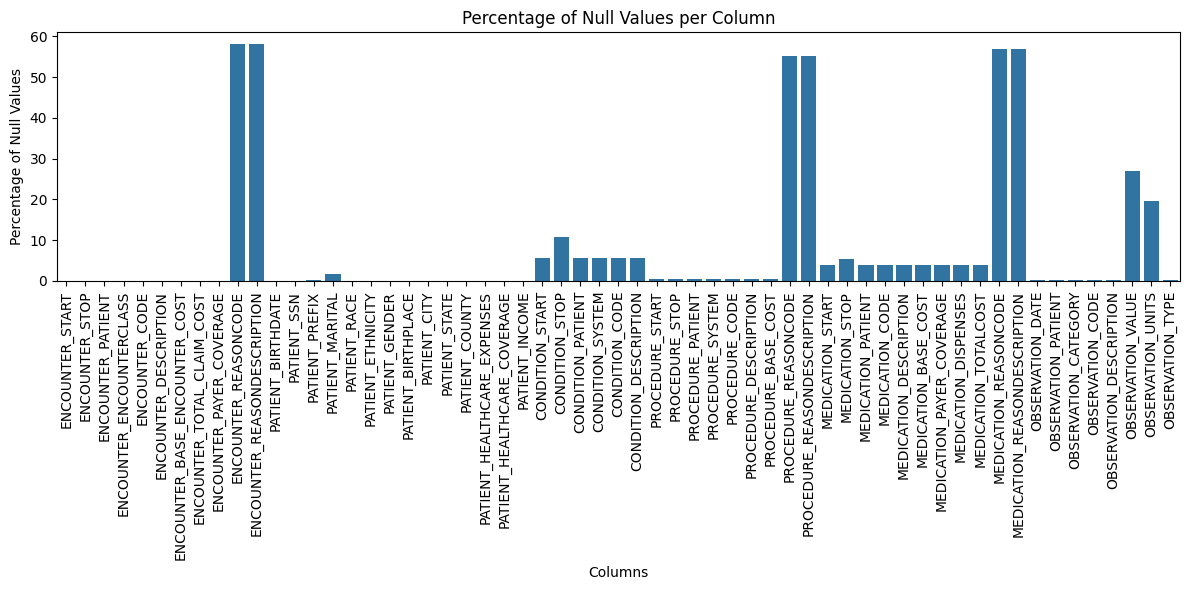

In [21]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()


In [22]:
# LOS
df['LENGTH_OF_STAY'] = (df['ENCOUNTER_STOP'] - df['ENCOUNTER_START']).dt.days

# fill missing cost values with median
cost_cols = ['ENCOUNTER_BASE_ENCOUNTER_COST', 'ENCOUNTER_TOTAL_CLAIM_COST']
df[cost_cols] = df[cost_cols].fillna(df[cost_cols].median())

# fill encounter missing values with mode
df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


<ipython-input-22-da61318f01ae>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ENCOUNTER_ENCOUNTERCLASS'].fillna(df['ENCOUNTER_ENCOUNTERCLASS'].mode()[0], inplace=True)


In [23]:
# fill demographic missing values with "UNKNOWN"
demo_cols = ['PATIENT_GENDER', 'PATIENT_RACE', 'PATIENT_ETHNICITY']
for col in demo_cols:
    # add 'UNKNOWN' as a new category
    if 'UNKNOWN' not in df[col].cat.categories:
        df[col] = df[col].cat.add_categories(['UNKNOWN'])
    df[col] = df[col].fillna('UNKNOWN')

In [24]:
# fill missing condition codes and descriptions with "UNKNOWN"

if 'UNKNOWN' not in df['CONDITION_DESCRIPTION'].cat.categories:
    df['CONDITION_DESCRIPTION'] = df['CONDITION_DESCRIPTION'].cat.add_categories(['UNKNOWN'])
df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
df['CONDITION_CODE'].fillna(-1, inplace=True)

<ipython-input-24-58be6f5a4519>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CONDITION_DESCRIPTION'].fillna('UNKNOWN', inplace=True)
<ipython-input-24-58be6f5a4519>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [25]:
# fill missing medication and procedure details
df['MEDICATION_CODE'].fillna(-1, inplace=True)
df['PROCEDURE_CODE'].fillna(-1, inplace=True)
df['OBSERVATION_VALUE'].fillna(df['OBSERVATION_VALUE'].median(), inplace=True)

if 'UNKNOWN' not in df['OBSERVATION_CATEGORY'].cat.categories:
    df['OBSERVATION_CATEGORY'] = df['OBSERVATION_CATEGORY'].cat.add_categories(['UNKNOWN'])

df['OBSERVATION_CATEGORY'].fillna('UNKNOWN', inplace=True)

<ipython-input-25-b8f8d6213b12>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MEDICATION_CODE'].fillna(-1, inplace=True)
<ipython-input-25-b8f8d6213b12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [26]:
drop_cols = ['OBSERVATION_TYPE', 'OBSERVATION_UNITS', 'OBSERVATION_CODE',
             'PATIENT_PREFIX', 'PATIENT_BIRTHPLACE']
df.drop(columns=drop_cols, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 55 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

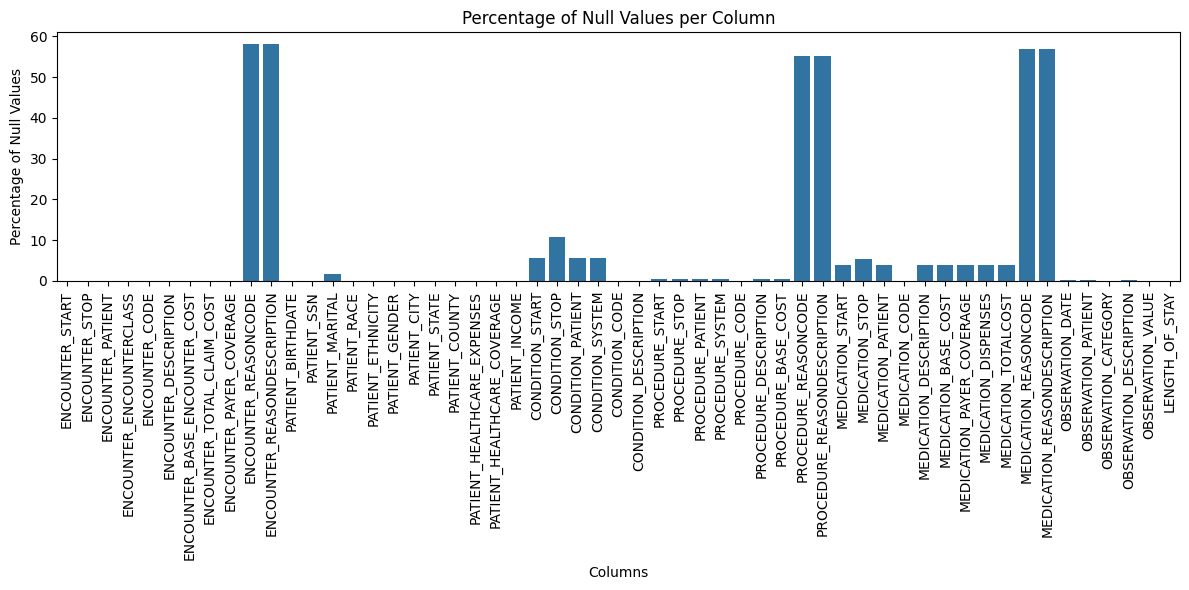

In [28]:
null_percentages = df.isnull().sum() / len(df) * 100

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=null_percentages.index, y=null_percentages.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Null Values")
plt.title("Percentage of Null Values per Column")
plt.tight_layout()
plt.show()

# DF Creation for Modeling

### Correlations

In [29]:
df.index

RangeIndex(start=0, stop=3887768, step=1)

In [30]:
df['ENCOUNTER_ENCOUNTERCLASS'].value_counts()

,count
ENCOUNTER_ENCOUNTERCLASS,
inpatient,1600390
outpatient,787527
urgentcare,757153
wellness,658282
emergency,56836
ambulatory,27082
snf,224
hospice,220
home,29


In [31]:
df['ENCOUNTER_CODE'].value_counts()

,count
ENCOUNTER_CODE,
1505002,1561476
185349003,792502
702927004,757151
162673000,645921
50849002,55183
305432006,26690
185347001,13875
410620009,12355
397821002,12160


In [32]:
clinical_reason_map = {
    # Routine / Wellness visits
    1505002: 'routine',
    162673000: 'routine',
    410620009: 'routine',
    308646001: 'routine',

    # Acute / Emergency symptoms
    50849002: 'acute',
    185347001: 'acute',  # chest pain
    86013001: 'acute',  # chest pain finding
    183460006: 'acute',
    183452005: 'acute',
    182813001: 'acute',
    183478001: 'acute',
    183495009: 'acute',
    390906007: 'acute',
    56876005: 'acute', # fever finding

    # Chronic Disease Management
    305432006: 'chronic',
    305336008: 'chronic',
    305408004: 'chronic',
    305411003: 'chronic',
    305342007: 'chronic',
    185349003: 'chronic',
    308335008: 'chronic',

    # Behavioral / Mental Health
    424619006: 'behavioral',
    424441002: 'behavioral',
    439740005: 'behavioral',

    # End-of-life / Home / Hospice
    305336008: 'end_of_life',
    439708006: 'end_of_life',
    79094001: 'end_of_life',

    # Telehealth / Virtual
    185316007: 'virtual',
    453131000124105: 'virtual',

    # Outpatient / Specialty or Ambulatory
    32485007: 'specialty',
    33879002: 'specialty',
    308251003: 'specialty',
    397821002: 'specialty',
    698314001: 'specialty',
    185345009: 'specialty',
    394701000: 'specialty',
    386395000: 'specialty',
    185389009: 'specialty',
    169762003: 'specialty',
    170837001: 'specialty',
    223484005: 'specialty',
    270427003: 'specialty',
    310061009: 'specialty',
    371883000: 'specialty',
    410410006: 'specialty',

    # Urgent Care
    702927004: 'urgentcare',

    # Other / Unknown
    308646001: 'other',  # fallback
    308335008: 'other',  # fallback if not elsewhere
    185389009: 'other',  # fallback
}

df['REASON_GROUPED'] = df['ENCOUNTER_CODE'].map(clinical_reason_map)


print(df['REASON_GROUPED'].value_counts())

REASON_GROUPED
routine        2219752
chronic         819216
urgentcare      757151
acute            70688
specialty        17826
behavioral        2634
end_of_life        251
other              234
virtual             16
Name: count, dtype: int64


In [33]:
null_counts_by_encounter = df.groupby('ENCOUNTER_CODE')['REASON_GROUPED'].apply(lambda x: x.isnull().sum())

null_counts_by_encounter


,REASON_GROUPED
ENCOUNTER_CODE,
1505002,0
32485007,0
33879002,0
50849002,0
56876005,0
79094001,0
86013001,0
162673000,0
169762003,0


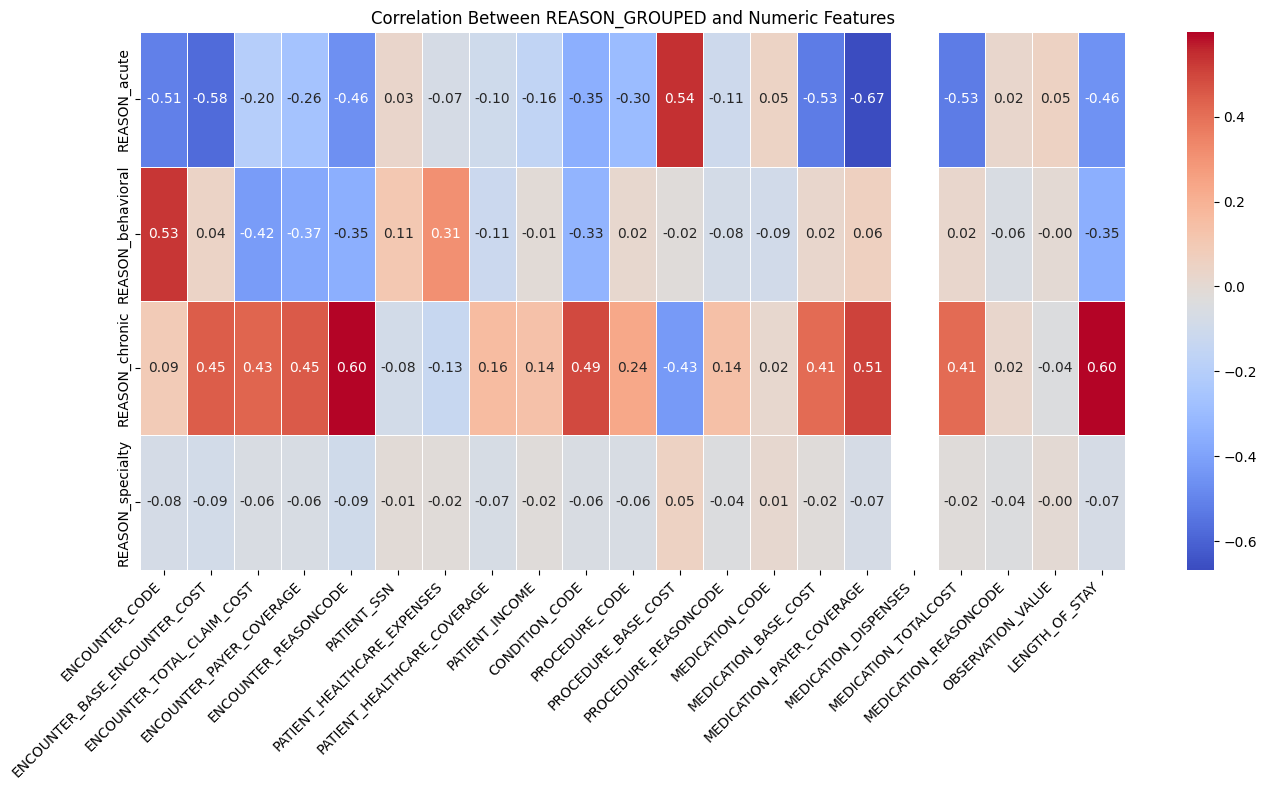

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

df_clean = df[numeric_cols + ['REASON_GROUPED']].dropna()

reason_dummies = pd.get_dummies(df_clean['REASON_GROUPED'], prefix='REASON')

corr_df = pd.concat([reason_dummies, df_clean[numeric_cols]], axis=1)

corr_matrix = corr_df.corr()

reason_columns = reason_dummies.columns
subset_corr = corr_matrix.loc[reason_columns, numeric_cols]

plt.figure(figsize=(14, 8))
sns.heatmap(subset_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between REASON_GROUPED and Numeric Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<ipython-input-35-88727fe6fb0e>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-35-88727fe6fb0e>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-35-88727fe6fb0e>:16: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
<ipython-input-35-88727fe6fb0e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette="coolwarm")


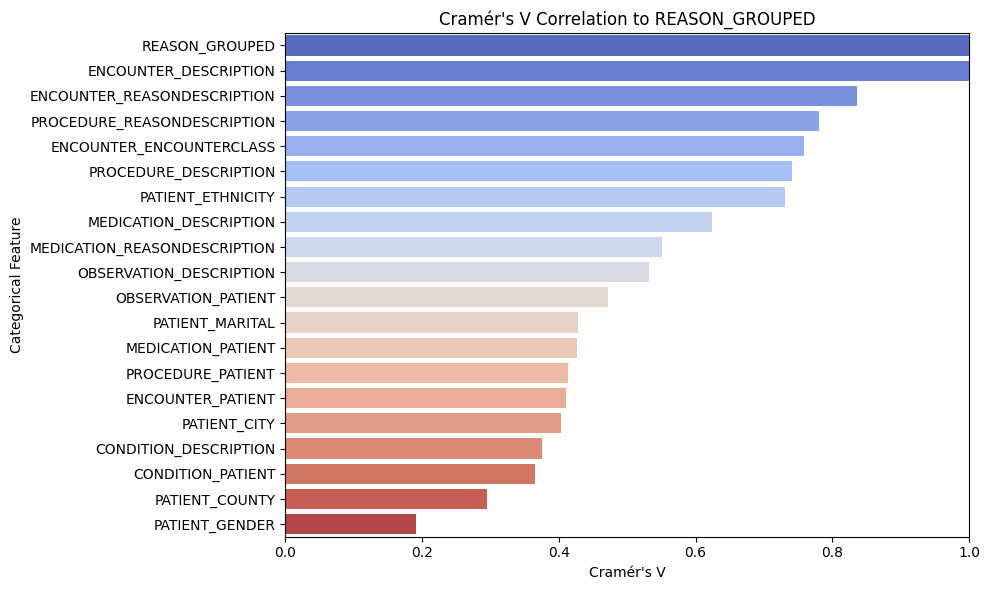

,0
REASON_GROUPED,1.000000
ENCOUNTER_DESCRIPTION,0.999995
ENCOUNTER_REASONDESCRIPTION,0.836476
PROCEDURE_REASONDESCRIPTION,0.780076
ENCOUNTER_ENCOUNTERCLASS,0.759030
PROCEDURE_DESCRIPTION,0.740954
PATIENT_ETHNICITY,0.730170
MEDICATION_DESCRIPTION,0.624210
MEDICATION_REASONDESCRIPTION,0.550424
OBSERVATION_DESCRIPTION,0.532194


In [35]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def cramers_v_vs_target(df, target_col, top_k=20):
    cat_cols = df.select_dtypes(include='category').columns
    scores = {}

    for col in cat_cols:
        try:
            score = cramers_v(df[col], df[target_col])
            scores[col] = score
        except:
            scores[col] = np.nan

    sorted_scores = pd.Series(scores).sort_values(ascending=False).head(top_k)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette="coolwarm")
    plt.title(f"Cramér's V Correlation to {target_col}")
    plt.xlabel("Cramér's V")
    plt.ylabel("Categorical Feature")
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

    return sorted_scores

df['REASON_GROUPED'] = df['REASON_GROUPED'].astype('category')

cramers_v_vs_target(df, 'REASON_GROUPED', top_k=20)



In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 56 columns):
 #   Column                         Dtype              
---  ------                         -----              
 0   ENCOUNTER_START                datetime64[ns, UTC]
 1   ENCOUNTER_STOP                 datetime64[ns, UTC]
 2   ENCOUNTER_PATIENT              category           
 3   ENCOUNTER_ENCOUNTERCLASS       category           
 4   ENCOUNTER_CODE                 int64              
 5   ENCOUNTER_DESCRIPTION          category           
 6   ENCOUNTER_BASE_ENCOUNTER_COST  float64            
 7   ENCOUNTER_TOTAL_CLAIM_COST     float64            
 8   ENCOUNTER_PAYER_COVERAGE       float64            
 9   ENCOUNTER_REASONCODE           float64            
 10  ENCOUNTER_REASONDESCRIPTION    category           
 11  PATIENT_BIRTHDATE              datetime64[ns]     
 12  PATIENT_SSN                    int64              
 13  PATIENT_MARITAL                category   

In [37]:
df['MEDICATION_DESCRIPTION'].unique()

[NaN, 'Acetaminophen 325 MG / HYDROcodone Bitartrate..., 'Ibuprofen 200 MG Oral Tablet', 'ferrous sulfate 325 MG Oral Tablet', 'Acetaminophen 325 MG Oral Tablet', ..., '150 ML vancomycin 5 MG/ML Injection', '1 ML Epoetin Alfa 4000 UNT/ML Injection [Epog..., 'pregabalin 100 MG Oral Capsule', 'duloxetine 20 MG Delayed Release Oral Capsule', 'Milnacipran hydrochloride 100 MG Oral Tablet']
Length: 122
Categories (121, object): ['0.25 ML Leuprolide Acetate 30 MG/ML Prefilled..., '0.4 ML Enoxaparin sodium 100 MG/ML Prefilled ...,
                           '1 ML DOCEtaxel 20 MG/ML Injection', '1 ML Epoetin Alfa 4000 UNT/ML Injection [Epog...,
                           ..., 'simvastatin 10 MG Oral Tablet',
                           'sodium fluoride 0.0272 MG/MG Oral Gel', 'sulfamethoxazole 800 MG / trimethoprim 160 MG...,
                           'tramadol hydrochloride 50 MG Oral Tablet']

Demographics:

- PATIENT_ETHNICITY
- PATIENT_MARITAL
- PATIENT_INCOME
- PATIENT_HEALTHCARE_EXPENSES
- PATIENT_HEALTHCARE_COVERAGE

Past Visit Summaries (aggregated):
- CONDITION_CODE
- PROCEDURE_CODE
- MEDICATION_CODE
- LENGTH_OF_STAY

In [38]:
selected_columns = ['PATIENT_SSN','REASON_GROUPED','ENCOUNTER_START','ENCOUNTER_STOP',
                    'PATIENT_ETHNICITY', 'PATIENT_MARITAL','PATIENT_INCOME',
                    'PATIENT_HEALTHCARE_EXPENSES','PATIENT_HEALTHCARE_COVERAGE',
                    'CONDITION_CODE','PROCEDURE_CODE', 'MEDICATION_CODE',
                    'LENGTH_OF_STAY']

df_encounter = df[selected_columns]

print(df_encounter.shape)
df_encounter.head()


(3887768, 13)


,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_ETHNICITY,PATIENT_MARITAL,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,CONDITION_CODE,PROCEDURE_CODE,MEDICATION_CODE,LENGTH_OF_STAY
0,999528591,routine,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,nonhispanic,M,100511,56904.96,18019.99,105531004.0,-1.0,-1.0,0
1,999528591,routine,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,nonhispanic,M,100511,56904.96,18019.99,224299000.0,-1.0,-1.0,0
2,999528591,routine,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,nonhispanic,M,100511,56904.96,18019.99,266934004.0,-1.0,-1.0,0
3,999528591,routine,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,nonhispanic,M,100511,56904.96,18019.99,422650009.0,-1.0,-1.0,0
4,999528591,routine,2012-04-01 09:04:48+00:00,2012-04-01 10:02:47+00:00,nonhispanic,M,100511,56904.96,18019.99,73595000.0,-1.0,-1.0,0


In [39]:
print(df['PATIENT_SSN'].nunique())
print(df_encounter['PATIENT_SSN'].nunique())

106
106


In [40]:
print(df['LENGTH_OF_STAY'].nunique())
print(df_encounter['LENGTH_OF_STAY'].nunique())

19
19


# Modeling

## Preparing data for modeling

In [41]:
df_encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 13 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_ETHNICITY            category           
 5   PATIENT_MARITAL              category           
 6   PATIENT_INCOME               int64              
 7   PATIENT_HEALTHCARE_EXPENSES  float64            
 8   PATIENT_HEALTHCARE_COVERAGE  float64            
 9   CONDITION_CODE               float64            
 10  PROCEDURE_CODE               float64            
 11  MEDICATION_CODE              float64            
 12  LENGTH_OF_STAY               int64              
dtypes: category(3), datetime64[ns, UTC](2), float64(5), int64(3)
memory usag

In [42]:
for col in df_encounter.columns:
  print(f"Column: {col}")
  print(f"Unique values: {df_encounter[col].unique()}")
  print(f"Number of unique values: {df_encounter[col].nunique()}")
  print("-" * 20)


Column: PATIENT_SSN
Unique values: [999528591 999753953 999701925 999279779 999508977 999134533 999407708
 999974087 999781635 999275104 999928141 999458615 999347979 999403433
 999782115 999631144 999232995 999391650 999633716 999991204 999569262
 999674493 999942622 999869285 999919353 999192698 999318213 999779788
 999865958 999996229 999985513 999774825 999695930 999511779 999317333
 999578287 999272946 999762430 999303282 999601723 999235491 999903605
 999546238 999128428 999695195 999312376 999831371 999906273 999925113
 999746285 999483846 999977674 999367379 999755285 999249748 999733713
 999236684 999882277 999576333 999779888 999481113 999946931 999712141
 999952901 999629739 999532490 999163735 999548844 999569247 999178864
 999415328 999535003 999721151 999996945 999291152 999345848 999104511
 999503586 999585560 999905038 999128492 999212495 999617485 999165935
 999565183 999498425 999176364 999878692 999838671 999742047 999165553
 999446753 999688032 999832319 999481463 9

In [43]:
# One-hot encode
marital_encoded = pd.get_dummies(df_encounter['PATIENT_MARITAL'], prefix='MARITAL', drop_first=True)

# One-hot encode
ethnicity_encoded = pd.get_dummies(df_encounter['PATIENT_ETHNICITY'], prefix='ETHNICITY', drop_first=True)

# Concat encoded columns with the df_los
df_encounter = pd.concat([df_encounter, marital_encoded, ethnicity_encoded], axis=1)

# Drop the og cat columns after encoding
df_encounter = df_encounter.drop(['PATIENT_MARITAL','PATIENT_ETHNICITY'], axis=1)


In [44]:
print(df_encounter['CONDITION_CODE'].unique())
print(df_encounter['PROCEDURE_CODE'].unique())
print(df_encounter['MEDICATION_CODE'].unique())
print(df_encounter['LENGTH_OF_STAY'].unique())

[ 1.05531004e+08  2.24299000e+08  2.66934004e+08  4.22650009e+08
  7.35950000e+07  3.14529007e+08  1.60903007e+08  7.13458007e+08
  1.25605004e+08  3.59817006e+08 -1.00000000e+00  4.23315002e+08
  7.06893006e+08  6.63830090e+07  1.18760400e+09  1.09398810e+16
  7.14628002e+08  1.95662009e+08  4.44814009e+08  2.71737000e+08
  7.34380040e+07  1.62864005e+08  3.84709000e+08  4.44650070e+07
  1.87180030e+07  2.83545005e+08  2.62574004e+08  8.16290090e+07
  4.27898007e+08  6.18040060e+07  1.09570002e+08  1.60968000e+08
  1.24171000e+14  1.96416002e+08  8.24230010e+07  4.73461003e+08
  3.12608009e+08  3.70247008e+08  3.07426000e+08  7.28920020e+07
  4.24393004e+08  1.83996000e+08  2.67020005e+08  6.52500200e+06
  5.56800060e+07  6.53630020e+07  2.83371005e+08  4.38780080e+07
  2.40790010e+07  4.46096008e+08  4.28251008e+08  1.60904001e+08
  9.05600070e+07  1.05090020e+07  2.78602001e+08  2.78598003e+08
  6.84960030e+07  1.61140010e+07  8.40544004e+08  4.97270020e+07
  2.48595008e+08  8.42290

In [45]:
df_encounter['CONDITION_CODE'] = df_encounter['CONDITION_CODE'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x != -1 else 'UNKNOWN'
)

df_encounter['PROCEDURE_CODE'] = df_encounter['PROCEDURE_CODE'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x != -1 else 'UNKNOWN'
)
df_encounter['MEDICATION_CODE'] = df_encounter['MEDICATION_CODE'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and x != -1 else 'UNKNOWN'
)

print(df_encounter['CONDITION_CODE'].unique())
print(df_encounter['PROCEDURE_CODE'].unique())
print(df_encounter['MEDICATION_CODE'].unique())



['105531004' '224299000' '266934004' '422650009' '73595000' '314529007'
 '160903007' '713458007' '125605004' '359817006' 'UNKNOWN' '423315002'
 '706893006' '66383009' '1187604002' '10939881000119104' '714628002'
 '195662009' '444814009' '271737000' '73438004' '162864005' '384709000'
 '44465007' '18718003' '283545005' '262574004' '81629009' '427898007'
 '61804006' '109570002' '160968000' '124171000119105' '196416002'
 '82423001' '473461003' '312608009' '370247008' '307426000' '72892002'
 '424393004' '183996000' '267020005' '6525002' '55680006' '65363002'
 '283371005' '43878008' '24079001' '446096008' '428251008' '160904001'
 '90560007' '10509002' '278602001' '278598003' '68496003' '16114001'
 '840544004' '49727002' '248595008' '84229001' '68962001' '57676002'
 '386661006' '36955009' '840539006' '278860009' '1121000119107' '37320007'
 '59621000' '237602007' '414545008' '274531002' '87433001' '278588009'
 '741062008' '161744009' '284549007' '398254007' '266948004' '127013003'
 '9078100011

In [46]:
print(df_encounter['CONDITION_CODE'].nunique())
print(df_encounter['PROCEDURE_CODE'].nunique())
print(df_encounter['MEDICATION_CODE'].nunique())

176
226
117


In [47]:
df_encounter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               object             
 8   PROCEDURE_CODE               object             
 9   MEDICATION_CODE              object             
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [48]:
df_encounter['CONDITION_CODE'] = df_encounter['CONDITION_CODE'].replace('UNKNOWN', '0').astype(int)
df_encounter['PROCEDURE_CODE'] = df_encounter['PROCEDURE_CODE'].replace('UNKNOWN', '0').astype(int)
df_encounter['MEDICATION_CODE'] = df_encounter['MEDICATION_CODE'].replace('UNKNOWN', '0').astype(int)


In [49]:
df_encounter['MEDICATION_CODE'].unique()

array([      0,  857005,  310965,  310325,  313782, 1535362,  313820,
        751905, 1049221,  856987, 1860154,  748879, 1648755,  309097,
        198405,  562251,  834061, 1014676, 1870230,  198014,  197319,
        834102,  748962,  757594,  831533,  835603,  245134, 2001499,
        312961,  866412,  705129,  310798,  245314,  314076,  308136,
        896209,  309309,  849574, 1000126,  389221,  748856,  106258,
        311372,  106892, 1664463,  314231, 1043400,  807283,  860975,
        308192,  749762,  243670,  866924,  904419, 1049625, 1860480,
        752899,  309362, 1665060, 1659263, 1796676, 1740467,  311700,
       1808217, 1234995,  200243, 1735006,  997488,  978950,  312617,
        310385, 1804799,  209387, 1367439,  197511, 1049630,  206905,
        616830,  745752,  993770,  861467,  859088,  896001,  895996,
        562508,  198335,  198240, 2119714,  477045,  665078,  308182,
       1534809, 1856546,  351109,  351137,  197454, 1601380,  789980,
       1732186,  310

In [50]:
df_encounter.isnull().sum()


,0
PATIENT_SSN,0
REASON_GROUPED,0
ENCOUNTER_START,0
ENCOUNTER_STOP,0
PATIENT_INCOME,0
PATIENT_HEALTHCARE_EXPENSES,0
PATIENT_HEALTHCARE_COVERAGE,0
CONDITION_CODE,0
PROCEDURE_CODE,0
MEDICATION_CODE,0


In [51]:
df_encounter['LENGTH_OF_STAY'].unique()


array([ 0,  1,  2, 61,  8, 13,  6,  9,  4,  7,  3, 24, 11,  5, 26, 14, 34,
       30, 22])

<Axes: xlabel='REASON_GROUPED'>

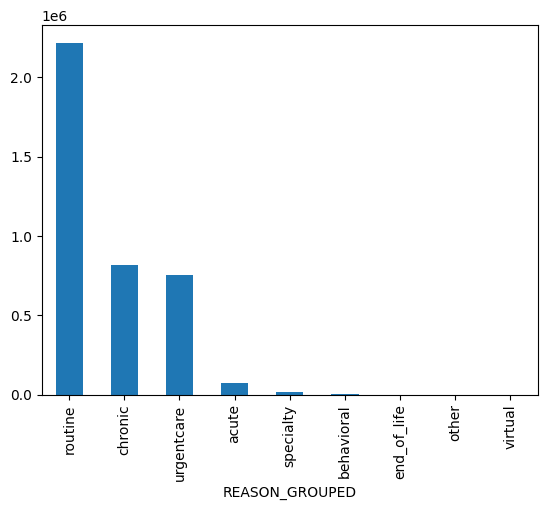

In [52]:
df_encounter['REASON_GROUPED'].value_counts()

df_encounter['REASON_GROUPED'].value_counts().plot(kind='bar')


<ipython-input-53-1cf56273127d>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_encounter['REASON_GROUPED'] = df_encounter['REASON_GROUPED'].replace(rare_classes, 'rare')


<Axes: xlabel='REASON_GROUPED'>

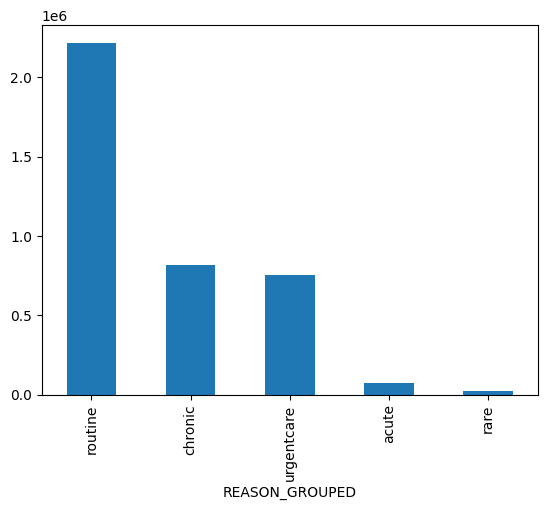

In [53]:
rare_classes = ['specialty', 'behavioral', 'end_of_life', 'other', 'virtual']
df_encounter['REASON_GROUPED'] = df_encounter['REASON_GROUPED'].replace(rare_classes, 'rare')

df_encounter['REASON_GROUPED'].value_counts()
df_encounter['REASON_GROUPED'].value_counts().plot(kind='bar')


In [54]:
df_encounter['REASON_GROUPED'].value_counts()

,count
REASON_GROUPED,
routine,2219752
chronic,819216
urgentcare,757151
acute,70688
rare,20961


## Simple Tree-based

### Splitting Dataset for tree-based


In [ ]:
df_encounter_tree = df_encounter.copy()

In [ ]:
df_encounter_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               int64              
 8   PROCEDURE_CODE               int64              
 9   MEDICATION_CODE              int64              
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [ ]:
# Using Frequency encoding bc of high cardinality risk
for col in ['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE']:
    freq = df_encounter_tree[col].value_counts(normalize=True)
    df_encounter_tree[f"{col}_FREQ"] = df_encounter_tree[col].map(freq)

# Drop og int cols for linear models
df_encounter_tree.drop(columns=['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE'], inplace=True)

# Fill any NaNs
numeric_cols = df_encounter_tree.select_dtypes(include=['float64', 'int64']).columns
df_encounter_tree[numeric_cols] = df_encounter_tree[numeric_cols].fillna(0)


In [ ]:
df_encounter_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
unique_patients = df_encounter_tree['PATIENT_SSN'].unique()
unique_patients

array([999528591, 999753953, 999701925, 999279779, 999508977, 999134533,
       999407708, 999974087, 999781635, 999275104, 999928141, 999458615,
       999347979, 999403433, 999782115, 999631144, 999232995, 999391650,
       999633716, 999991204, 999569262, 999674493, 999942622, 999869285,
       999919353, 999192698, 999318213, 999779788, 999865958, 999996229,
       999985513, 999774825, 999695930, 999511779, 999317333, 999578287,
       999272946, 999762430, 999303282, 999601723, 999235491, 999903605,
       999546238, 999128428, 999695195, 999312376, 999831371, 999906273,
       999925113, 999746285, 999483846, 999977674, 999367379, 999755285,
       999249748, 999733713, 999236684, 999882277, 999576333, 999779888,
       999481113, 999946931, 999712141, 999952901, 999629739, 999532490,
       999163735, 999548844, 999569247, 999178864, 999415328, 999535003,
       999721151, 999996945, 999291152, 999345848, 999104511, 999503586,
       999585560, 999905038, 999128492, 999212495, 

In [ ]:
all_patients = df_encounter_tree['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

n_total = len(unique_patients)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

train_patients = unique_patients[:n_train]
val_patients = unique_patients[n_train:n_train + n_val]
test_patients = unique_patients[n_train + n_val:]


In [ ]:
train_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(train_patients)]
val_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(val_patients)]
test_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(test_patients)]


In [ ]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [ ]:
routine_df = train_df[train_df['REASON_GROUPED'] == 'routine']
non_routine_df = train_df[train_df['REASON_GROUPED'] != 'routine']

routine_downsampled = routine_df.sample(n=1_000_000, random_state=101)

train_df_balanced = pd.concat([non_routine_df, routine_downsampled])
train_df = train_df_balanced.sample(frac=1, random_state=101).reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE', 'PATIENT_INCOME']

scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])

val_df[scale_cols] = scaler.transform(val_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [ ]:
train_df.head()

,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,LENGTH_OF_STAY,MARITAL_M,MARITAL_S,MARITAL_W,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,CONDITION_CODE_FREQ,PROCEDURE_CODE_FREQ,MEDICATION_CODE_FREQ
0,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819
1,999774825,urgentcare,2019-09-11 04:54:35+00:00,2019-09-11 05:48:03+00:00,0.562658,1.270723,0.496818,0,True,False,False,True,False,0.074497,0.093884,0.098961
2,999347979,chronic,2021-08-11 14:05:28+00:00,2021-08-11 14:58:50+00:00,-0.769033,-0.844497,1.286387,0,False,False,True,True,False,0.141834,0.027433,0.064646
3,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.015116,0.200819
4,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373486 entries, 0 to 2373485
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_REASON_GROUPED'] = df.groupby('PATIENT_SSN')['REASON_GROUPED'].shift(-1)
    result = df.dropna(subset=['NEXT_REASON_GROUPED'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [ ]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 0 to 2373481
Data columns (total 17 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FREQ    

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_df['NEXT_REASON_GROUPED'].cat.categories.to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['NEXT_REASON_GROUPED']
)

class_weight_dict = dict(zip(classes, weights))


In [ ]:
def add_time_features(df):
    df = df.sort_values(['PATIENT_SSN', 'ENCOUNTER_START'])  # ensure correct order
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].clip(lower=0)  # fix right here!
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])        # now safe
    return df


# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 2203432 to 386612
Data columns (total 19 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

### Modeling

In [ ]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import gc

# Features and target
features = [col for col in train_df.columns if col not in ['REASON_GROUPED','NEXT_REASON_GROUPED', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_REASON_GROUPED']
X_val, y_val = val_df[features], val_df['NEXT_REASON_GROUPED']
X_test, y_test = test_df[features], test_df['NEXT_REASON_GROUPED']

# Define models
models = {
    "Random Forest": RandomForestClassifier(
        n_estimators=50,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=101,
        n_jobs = -1,
        class_weight=class_weight_dict
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=50,
        learning_rate=0.05,
        max_depth=5,
        random_state=101
    ),
}

# Train and evaluate
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Evaluate on training data
    y_pred_train = model.predict(X_train)
    print(f"\n{model_name} Training Performance:")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(classification_report(y_train, y_pred_train))

    # Evaluate on validation data
    y_pred_val = model.predict(X_val)
    print(f"\n{model_name} Validation Performance:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
    print(classification_report(y_val, y_pred_val))

    # Evaluate on test data
    y_pred_test = model.predict(X_test)
    print(f"\n{model_name} Test Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(classification_report(y_test, y_pred_test))

    del model
    gc.collect()



Training Random Forest...

Random Forest Training Performance:
Accuracy: 0.6911
              precision    recall  f1-score   support

       acute       0.16      0.20      0.18     46939
     chronic       0.56      0.33      0.41    615959
        rare       0.30      0.91      0.45     18268
     routine       0.98      0.86      0.92    999941
  urgentcare       0.54      0.80      0.65    692305

    accuracy                           0.69   2373412
   macro avg       0.51      0.62      0.52   2373412
weighted avg       0.72      0.69      0.69   2373412


Random Forest Validation Performance:
Accuracy: 0.2860
              precision    recall  f1-score   support

       acute       0.33      0.00      0.00     10222
     chronic       0.38      0.23      0.29    129279
        rare       0.04      0.45      0.08      1834
     routine       0.33      0.43      0.37    104644
  urgentcare       0.12      0.15      0.13     45272

    accuracy                           0.29    2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13519
     chronic       0.00      0.00      0.00     73970
        rare       0.00      0.58      0.01       854
     routine       0.57      0.49      0.52     53557
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.17    161472
   macro avg       0.11      0.21      0.11    161472
weighted avg       0.19      0.17      0.17    161472


Training Gradient Boosting...

Gradient Boosting Training Performance:
Accuracy: 0.7080
              precision    recall  f1-score   support

       acute       0.75      0.00      0.00     46939
     chronic       0.54      0.36      0.43    615959
        rare       0.74      0.69      0.72     18268
     routine       0.97      0.89      0.93    999941
  urgentcare       0.54      0.80      0.65    692305

    accuracy                           0.71   2373412
   macro avg       0.71      0.55      0.5

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13519
     chronic       0.20      0.00      0.00     73970
        rare       0.00      0.00      0.00       854
     routine       0.33      1.00      0.50     53557
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.33    161472
   macro avg       0.11      0.20      0.10    161472
weighted avg       0.20      0.33      0.17    161472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Linear Models

### Splitting dataset for linear models

In [ ]:
df_encounter_linear = df_encounter.copy()

In [ ]:
df_encounter_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               int64              
 8   PROCEDURE_CODE               int64              
 9   MEDICATION_CODE              int64              
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [ ]:
# Using Frequency encoding bc of high cardinality risk
for col in ['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE']:
    freq = df_encounter_linear[col].value_counts(normalize=True)
    df_encounter_linear[f"{col}_FREQ"] = df_encounter_linear[col].map(freq)

# Drop og int cols for linear models
df_encounter_linear.drop(columns=['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE'], inplace=True)

# Fill any NaNs
numeric_cols = df_encounter_linear.select_dtypes(include=['float64', 'int64']).columns
df_encounter_linear[numeric_cols] = df_encounter_linear[numeric_cols].fillna(0)


In [ ]:
df_encounter_linear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
unique_patients = df_encounter_linear['PATIENT_SSN'].unique()
unique_patients

array([999528591, 999753953, 999701925, 999279779, 999508977, 999134533,
       999407708, 999974087, 999781635, 999275104, 999928141, 999458615,
       999347979, 999403433, 999782115, 999631144, 999232995, 999391650,
       999633716, 999991204, 999569262, 999674493, 999942622, 999869285,
       999919353, 999192698, 999318213, 999779788, 999865958, 999996229,
       999985513, 999774825, 999695930, 999511779, 999317333, 999578287,
       999272946, 999762430, 999303282, 999601723, 999235491, 999903605,
       999546238, 999128428, 999695195, 999312376, 999831371, 999906273,
       999925113, 999746285, 999483846, 999977674, 999367379, 999755285,
       999249748, 999733713, 999236684, 999882277, 999576333, 999779888,
       999481113, 999946931, 999712141, 999952901, 999629739, 999532490,
       999163735, 999548844, 999569247, 999178864, 999415328, 999535003,
       999721151, 999996945, 999291152, 999345848, 999104511, 999503586,
       999585560, 999905038, 999128492, 999212495, 

In [ ]:
all_patients = df_encounter_linear['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

n_total = len(unique_patients)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

train_patients = unique_patients[:n_train]
val_patients = unique_patients[n_train:n_train + n_val]
test_patients = unique_patients[n_train + n_val:]


In [ ]:
train_df = df_encounter_linear[df_encounter_linear['PATIENT_SSN'].isin(train_patients)]
val_df = df_encounter_linear[df_encounter_linear['PATIENT_SSN'].isin(val_patients)]
test_df = df_encounter_linear[df_encounter_linear['PATIENT_SSN'].isin(test_patients)]


In [ ]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [ ]:
routine_df = train_df[train_df['REASON_GROUPED'] == 'routine']
non_routine_df = train_df[train_df['REASON_GROUPED'] != 'routine']

routine_downsampled = routine_df.sample(n=1_000_000, random_state=101)

train_df_balanced = pd.concat([non_routine_df, routine_downsampled])
train_df = train_df_balanced.sample(frac=1, random_state=101).reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE', 'PATIENT_INCOME']

scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])

val_df[scale_cols] = scaler.transform(val_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [ ]:
train_df.head()

,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,LENGTH_OF_STAY,MARITAL_M,MARITAL_S,MARITAL_W,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,CONDITION_CODE_FREQ,PROCEDURE_CODE_FREQ,MEDICATION_CODE_FREQ
0,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819
1,999774825,urgentcare,2019-09-11 04:54:35+00:00,2019-09-11 05:48:03+00:00,0.562658,1.270723,0.496818,0,True,False,False,True,False,0.074497,0.093884,0.098961
2,999347979,chronic,2021-08-11 14:05:28+00:00,2021-08-11 14:58:50+00:00,-0.769033,-0.844497,1.286387,0,False,False,True,True,False,0.141834,0.027433,0.064646
3,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.015116,0.200819
4,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373486 entries, 0 to 2373485
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_REASON_GROUPED'] = df.groupby('PATIENT_SSN')['REASON_GROUPED'].shift(-1)
    result = df.dropna(subset=['NEXT_REASON_GROUPED'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [ ]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 0 to 2373481
Data columns (total 17 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FREQ    

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_df['NEXT_REASON_GROUPED'].cat.categories.to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['NEXT_REASON_GROUPED']
)

class_weight_dict = dict(zip(classes, weights))


In [ ]:
def add_time_features(df):
    df = df.sort_values(['PATIENT_SSN', 'ENCOUNTER_START'])  # ensure correct order
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].clip(lower=0)  # fix right here!
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])        # now safe
    return df


# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 2203432 to 386612
Data columns (total 19 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

### Modeling

In [ ]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import classification_report, accuracy_score
import gc

# Define features and target
features = [col for col in train_df.columns if col not in ['REASON_GROUPED', 'NEXT_REASON_GROUPED', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_REASON_GROUPED']
X_val, y_val = val_df[features], val_df['NEXT_REASON_GROUPED']
X_test, y_test = test_df[features], test_df['NEXT_REASON_GROUPED']

# Define models
models = {
    "Logistic Regression": LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        class_weight='balanced',
        max_iter=500,
        random_state=101
    ),
    "Ridge Classifier": RidgeClassifier(
        class_weight='balanced',
        random_state=101
    ),
    "SGD Classifier": SGDClassifier(
        loss='log_loss',  # Use 'hinge' for SVM-style
        class_weight='balanced',
        max_iter=1000,
        random_state=101
    )
}

# Train and evaluate
for model_name, model in models.items():
    print(f"\n Training {model_name}...")
    model.fit(X_train, y_train)

    # Training Performance
    y_pred_train = model.predict(X_train)
    print(f"\n {model_name} Training Performance:")
    print(f"Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(classification_report(y_train, y_pred_train))

    # Validation Performance
    y_pred_val = model.predict(X_val)
    print(f"\n {model_name} Validation Performance:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred_val):.4f}")
    print(classification_report(y_val, y_pred_val))

    # Test Performance
    y_pred_test = model.predict(X_test)
    print(f"\n {model_name} Test Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
    print(classification_report(y_test, y_pred_test))

    # Clean up
    del model
    gc.collect()



 Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 Logistic Regression Training Performance:
Accuracy: 0.6474
              precision    recall  f1-score   support

       acute       0.08      0.20      0.12     46939
     chronic       0.54      0.27      0.37    615959
        rare       0.14      0.88      0.24     18268
     routine       0.99      0.79      0.88    999941
  urgentcare       0.54      0.80      0.64    692305

    accuracy                           0.65   2373412
   macro avg       0.46      0.59      0.45   2373412
weighted avg       0.72      0.65      0.66   2373412


 Logistic Regression Validation Performance:
Accuracy: 0.1793
              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     10222
     chronic       0.38      0.27      0.31    129279
        rare       0.01      0.72      0.02      1834
     routine       0.81      0.09      0.16    104644
  urgentcare       0.12      0.16      0.14     45272

    accuracy                           0.18    291251
   macr

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Label encode the target (Keras needs integers)
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_val_enc = label_encoder.transform(y_val)
y_test_enc = label_encoder.transform(y_test)

# Optionally: One-hot encode for categorical_crossentropy
y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)

# Build the MLP
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')  # Multiclass output
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


from sklearn.utils.class_weight import compute_class_weight

# Compute weights
classes = label_encoder.classes_
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Then pass it into model.fit
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=1024,
    class_weight=class_weight_dict,  # 👈 this is key
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6024 - loss: 0.9927 - val_accuracy: 0.1433 - val_loss: 2.4353
Epoch 2/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6720 - loss: 0.8833 - val_accuracy: 0.0967 - val_loss: 2.5628
Epoch 3/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6787 - loss: 0.8753 - val_accuracy: 0.0934 - val_loss: 2.5902
Epoch 4/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6816 - loss: 0.8683 - val_accuracy: 0.1058 - val_loss: 2.5489
Epoch 5/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6837 - loss: 0.8668 - val_accuracy: 0.1246 - val_loss: 2.6697
Epoch 6/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6850 - loss: 0.8638 - val_accuracy: 0.1565 - val_loss: 2.6649
Epoch 7/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6855 - loss: 0.8633 - val_accuracy: 0.1575 - val_loss: 2.7122
Epoch 8/10
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6863 - loss: 0

In [ ]:
from sklearn.metrics import classification_report

y_pred_test = model.predict(X_test)
y_pred_classes = y_pred_test.argmax(axis=1)
y_true_classes = y_test_enc

print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))


5046/5046 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13519
     chronic       0.51      0.02      0.04     73970
        rare       0.02      0.30      0.03       854
     routine       0.28      0.75      0.41     53557
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.26    161472
   macro avg       0.16      0.21      0.10    161472
weighted avg       0.33      0.26      0.15    161472



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Sequential Models

### Splitting the Data for sequential models

In [ ]:
df_encounter_seq = df_encounter.copy()

In [ ]:
df_encounter_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               int64              
 8   PROCEDURE_CODE               int64              
 9   MEDICATION_CODE              int64              
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [ ]:
# Using Frequency encoding bc of high cardinality risk
for col in ['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE']:
    freq = df_encounter_seq[col].value_counts(normalize=True)
    df_encounter_seq[f"{col}_FREQ"] = df_encounter_seq[col].map(freq)

# Drop og int cols for linear models
df_encounter_seq.drop(columns=['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE'], inplace=True)

# Fill any NaNs
numeric_cols = df_encounter_seq.select_dtypes(include=['float64', 'int64']).columns
df_encounter_seq[numeric_cols] = df_encounter_seq[numeric_cols].fillna(0)


In [ ]:
df_encounter_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
unique_patients = df_encounter_seq['PATIENT_SSN'].unique()
unique_patients

array([999528591, 999753953, 999701925, 999279779, 999508977, 999134533,
       999407708, 999974087, 999781635, 999275104, 999928141, 999458615,
       999347979, 999403433, 999782115, 999631144, 999232995, 999391650,
       999633716, 999991204, 999569262, 999674493, 999942622, 999869285,
       999919353, 999192698, 999318213, 999779788, 999865958, 999996229,
       999985513, 999774825, 999695930, 999511779, 999317333, 999578287,
       999272946, 999762430, 999303282, 999601723, 999235491, 999903605,
       999546238, 999128428, 999695195, 999312376, 999831371, 999906273,
       999925113, 999746285, 999483846, 999977674, 999367379, 999755285,
       999249748, 999733713, 999236684, 999882277, 999576333, 999779888,
       999481113, 999946931, 999712141, 999952901, 999629739, 999532490,
       999163735, 999548844, 999569247, 999178864, 999415328, 999535003,
       999721151, 999996945, 999291152, 999345848, 999104511, 999503586,
       999585560, 999905038, 999128492, 999212495, 

In [ ]:
all_patients = df_encounter_seq['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

n_total = len(unique_patients)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

train_patients = unique_patients[:n_train]
val_patients = unique_patients[n_train:n_train + n_val]
test_patients = unique_patients[n_train + n_val:]


In [ ]:
train_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(train_patients)]
val_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(val_patients)]
test_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(test_patients)]


In [ ]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [ ]:
routine_df = train_df[train_df['REASON_GROUPED'] == 'routine']
non_routine_df = train_df[train_df['REASON_GROUPED'] != 'routine']

routine_downsampled = routine_df.sample(n=1_000_000, random_state=101)

train_df_balanced = pd.concat([non_routine_df, routine_downsampled])
train_df = train_df_balanced.sample(frac=1, random_state=101).reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE', 'PATIENT_INCOME']

scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])

val_df[scale_cols] = scaler.transform(val_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [ ]:
train_df.head()

,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,LENGTH_OF_STAY,MARITAL_M,MARITAL_S,MARITAL_W,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,CONDITION_CODE_FREQ,PROCEDURE_CODE_FREQ,MEDICATION_CODE_FREQ
0,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819
1,999774825,urgentcare,2019-09-11 04:54:35+00:00,2019-09-11 05:48:03+00:00,0.562658,1.270723,0.496818,0,True,False,False,True,False,0.074497,0.093884,0.098961
2,999347979,chronic,2021-08-11 14:05:28+00:00,2021-08-11 14:58:50+00:00,-0.769033,-0.844497,1.286387,0,False,False,True,True,False,0.141834,0.027433,0.064646
3,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.015116,0.200819
4,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373486 entries, 0 to 2373485
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_REASON_GROUPED'] = df.groupby('PATIENT_SSN')['REASON_GROUPED'].shift(-1)
    result = df.dropna(subset=['NEXT_REASON_GROUPED'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [ ]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 0 to 2373481
Data columns (total 17 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FREQ    

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_df['NEXT_REASON_GROUPED'].cat.categories.to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['NEXT_REASON_GROUPED']
)

class_weight_dict = dict(zip(classes, weights))


In [ ]:
def add_time_features(df):
    df = df.sort_values(['PATIENT_SSN', 'ENCOUNTER_START'])  # ensure correct order
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].clip(lower=0)  # fix right here!
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])        # now safe
    return df


# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 2203432 to 386612
Data columns (total 19 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

### Modeling

In [ ]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [ ]:
def create_sequences(df, n_steps, label_col):
    X, y = [], []
    grouped = df.groupby('PATIENT_SSN')

    for _, group in grouped:
        group = group.sort_values('DAYS_SINCE_LAST')  # ensure time order
        features = group.drop(columns=['PATIENT_SSN', label_col, 'REASON_GROUPED']).values
        labels = group[label_col].values

        for i in range(len(group) - n_steps):
            X.append(features[i:i+n_steps])
            y.append(labels[i+n_steps])

    return np.array(X, dtype='float32'), np.array(y)



In [ ]:
SEQ_LEN = 5  # or 10

X_train_seq, y_train_seq = create_sequences(train_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')
X_val_seq, y_val_seq = create_sequences(val_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')
X_test_seq, y_test_seq = create_sequences(test_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_seq)
y_val_enc = label_encoder.transform(y_val_seq)
y_test_enc = label_encoder.transform(y_test_seq)

y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)


#### LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, X_train_seq.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# You already have this probably:
classes = label_encoder.classes_
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_seq)
class_weight_dict = dict(zip(range(len(classes)), class_weights))

# Add this to model.fit:
model.fit(
    X_train_seq, y_train_cat,
    validation_data=(X_val_seq, y_val_cat),
    epochs=15,
    batch_size=1024,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.6764 - loss: 0.8845 - val_accuracy: 0.2448 - val_loss: 3.4315
Epoch 2/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 120s 52ms/step - accuracy: 0.6873 - loss: 0.8635 - val_accuracy: 0.2357 - val_loss: 3.4146
Epoch 3/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 100s 34ms/step - accuracy: 0.6862 - loss: 0.8587 - val_accuracy: 0.2628 - val_loss: 3.4651
Epoch 4/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.6876 - loss: 0.8570 - val_accuracy: 0.2493 - val_loss: 3.5970
Epoch 5/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.6868 - loss: 0.8569 - val_accuracy: 0.2519 - val_loss: 3.6928


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model.predict(X_test_seq)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test_enc, y_pred_classes, target_names=label_encoder.classes_))


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13514
     chronic       0.48      0.00      0.00     73959
        rare       0.02      0.40      0.04       854
     routine       0.22      0.54      0.31     53518
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.18    161417
   macro avg       0.14      0.19      0.07    161417
weighted avg       0.29      0.18      0.10    161417



#### GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define model
gru_model = Sequential([
    GRU(64, input_shape=(SEQ_LEN, X_train_seq.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

gru_history = gru_model.fit(
    X_train_seq, y_train_cat,
    validation_data=(X_val_seq, y_val_cat),
    epochs=15,
    batch_size=1024,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 101s 42ms/step - accuracy: 0.6072 - loss: 0.9681 - val_accuracy: 0.0962 - val_loss: 2.8582
Epoch 2/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 140s 42ms/step - accuracy: 0.6709 - loss: 0.8857 - val_accuracy: 0.2021 - val_loss: 3.3190
Epoch 3/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 97s 42ms/step - accuracy: 0.6825 - loss: 0.8691 - val_accuracy: 0.2015 - val_loss: 3.4613
Epoch 4/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 141s 41ms/step - accuracy: 0.6848 - loss: 0.8627 - val_accuracy: 0.1821 - val_loss: 3.3737


#### CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(SEQ_LEN, X_train_seq.shape[2])),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
cnn_history = cnn_model.fit(
    X_train_seq, y_train_cat,
    validation_data=(X_val_seq, y_val_cat),
    epochs=15,
    batch_size=1024,
    class_weight=class_weight_dict,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.5932 - loss: 0.9937 - val_accuracy: 0.1482 - val_loss: 2.4389
Epoch 2/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6656 - loss: 0.8897 - val_accuracy: 0.1021 - val_loss: 2.4048
Epoch 3/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.6759 - loss: 0.8792 - val_accuracy: 0.1575 - val_loss: 2.4029
Epoch 4/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.6795 - loss: 0.8721 - val_accuracy: 0.1609 - val_loss: 2.4181
Epoch 5/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.6813 - loss: 0.8670 - val_accuracy: 0.1566 - val_loss: 2.3164
Epoch 6/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 41s 10ms/step - accuracy: 0.6821 - loss: 0.8686 - val_accuracy: 0.1647 - val_loss: 2.2910
Epoch 7/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.6844 - loss: 0.8661 - val_accuracy: 0.1739 - val_loss: 2.4012
Epoch 8/15
2318/2318 ━━━━━━━━━━━━━━━━━━━━ 22s 10ms/step - accuracy: 0.6846 - lo

#### Evaluate both

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# GRU
gru_preds = gru_model.predict(X_test_seq)
gru_pred_classes = np.argmax(gru_preds, axis=1)
print("GRU Results:\n")
print(classification_report(y_test_enc, gru_pred_classes, target_names=label_encoder.classes_))

# CNN
cnn_preds = cnn_model.predict(X_test_seq)
cnn_pred_classes = np.argmax(cnn_preds, axis=1)
print("CNN Results:\n")
print(classification_report(y_test_enc, cnn_pred_classes, target_names=label_encoder.classes_))


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step
GRU Results:

              precision    recall  f1-score   support

       acute       0.09      0.00      0.00     13514
     chronic       0.00      0.00      0.00     73959
        rare       0.01      0.90      0.01       854
     routine       0.96      0.27      0.43     53518
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.10    161417
   macro avg       0.21      0.24      0.09    161417
weighted avg       0.33      0.10      0.14    161417

   1/5045 ━━━━━━━━━━━━━━━━━━━━ 5:53 70ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
CNN Results:

              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13514
     chronic       0.00      0.00      0.00     73959
        rare       0.01      0.23      0.03       854
     routine       0.22      0.55      0.31     53518
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.18    161417
   macro avg       0.05      0.16      0.07    161417
weighted avg       0.07      0.18      0.10    161417



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Best models were Gradient Boosting and LSTM

## Grid Searching and parameter tuning

### Gradient Boosting

#### Preprocessing

In [55]:
df_encounter_tree = df_encounter.copy()

In [56]:
df_encounter_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               int64              
 8   PROCEDURE_CODE               int64              
 9   MEDICATION_CODE              int64              
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [57]:
# Using Frequency encoding bc of high cardinality risk
for col in ['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE']:
    freq = df_encounter_tree[col].value_counts(normalize=True)
    df_encounter_tree[f"{col}_FREQ"] = df_encounter_tree[col].map(freq)

# Drop og int cols for linear models
df_encounter_tree.drop(columns=['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE'], inplace=True)

# Fill any NaNs
numeric_cols = df_encounter_tree.select_dtypes(include=['float64', 'int64']).columns
df_encounter_tree[numeric_cols] = df_encounter_tree[numeric_cols].fillna(0)


In [58]:
df_encounter_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [59]:
unique_patients = df_encounter_tree['PATIENT_SSN'].unique()
unique_patients

array([999528591, 999753953, 999701925, 999279779, 999508977, 999134533,
       999407708, 999974087, 999781635, 999275104, 999928141, 999458615,
       999347979, 999403433, 999782115, 999631144, 999232995, 999391650,
       999633716, 999991204, 999569262, 999674493, 999942622, 999869285,
       999919353, 999192698, 999318213, 999779788, 999865958, 999996229,
       999985513, 999774825, 999695930, 999511779, 999317333, 999578287,
       999272946, 999762430, 999303282, 999601723, 999235491, 999903605,
       999546238, 999128428, 999695195, 999312376, 999831371, 999906273,
       999925113, 999746285, 999483846, 999977674, 999367379, 999755285,
       999249748, 999733713, 999236684, 999882277, 999576333, 999779888,
       999481113, 999946931, 999712141, 999952901, 999629739, 999532490,
       999163735, 999548844, 999569247, 999178864, 999415328, 999535003,
       999721151, 999996945, 999291152, 999345848, 999104511, 999503586,
       999585560, 999905038, 999128492, 999212495, 

In [60]:
all_patients = df_encounter_tree['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

n_total = len(unique_patients)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

train_patients = unique_patients[:n_train]
val_patients = unique_patients[n_train:n_train + n_val]
test_patients = unique_patients[n_train + n_val:]


In [61]:
train_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(train_patients)]
val_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(val_patients)]
test_df = df_encounter_tree[df_encounter_tree['PATIENT_SSN'].isin(test_patients)]


In [62]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [63]:
routine_df = train_df[train_df['REASON_GROUPED'] == 'routine']
non_routine_df = train_df[train_df['REASON_GROUPED'] != 'routine']

routine_downsampled = routine_df.sample(n=1_000_000, random_state=101)

train_df_balanced = pd.concat([non_routine_df, routine_downsampled])
train_df = train_df_balanced.sample(frac=1, random_state=101).reset_index(drop=True)


In [64]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE', 'PATIENT_INCOME']

scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])

val_df[scale_cols] = scaler.transform(val_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [65]:
train_df.head()

,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,LENGTH_OF_STAY,MARITAL_M,MARITAL_S,MARITAL_W,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,CONDITION_CODE_FREQ,PROCEDURE_CODE_FREQ,MEDICATION_CODE_FREQ
0,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819
1,999774825,urgentcare,2019-09-11 04:54:35+00:00,2019-09-11 05:48:03+00:00,0.562658,1.270723,0.496818,0,True,False,False,True,False,0.074497,0.093884,0.098961
2,999347979,chronic,2021-08-11 14:05:28+00:00,2021-08-11 14:58:50+00:00,-0.769033,-0.844497,1.286387,0,False,False,True,True,False,0.141834,0.027433,0.064646
3,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.015116,0.200819
4,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373486 entries, 0 to 2373485
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [67]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_REASON_GROUPED'] = df.groupby('PATIENT_SSN')['REASON_GROUPED'].shift(-1)
    result = df.dropna(subset=['NEXT_REASON_GROUPED'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [68]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 0 to 2373481
Data columns (total 17 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FREQ    

In [70]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_df['NEXT_REASON_GROUPED'].cat.categories.to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['NEXT_REASON_GROUPED']
)

class_weight_dict = dict(zip(classes, weights))


In [71]:
def add_time_features(df):
    df = df.sort_values(['PATIENT_SSN', 'ENCOUNTER_START'])  # ensure correct order
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].clip(lower=0)  # fix right here!
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])        # now safe
    return df


# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [72]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 2203432 to 386612
Data columns (total 19 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

#### Grid Search

In [73]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [74]:
# Features and target
features = [col for col in train_df.columns if col not in ['REASON_GROUPED','NEXT_REASON_GROUPED', 'PATIENT_SSN']]
X_train, y_train = train_df[features], train_df['NEXT_REASON_GROUPED']
X_val, y_val = val_df[features], val_df['NEXT_REASON_GROUPED']
X_test, y_test = test_df[features], test_df['NEXT_REASON_GROUPED']

In [75]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'min_samples_split': [10],
    'min_samples_leaf': [5]
}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb_with_weights = GradientBoostingClassifier(
    random_state=101
)

grid_search_with_weights = GridSearchCV(
    estimator=gb_with_weights,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=3,
    n_jobs=-1
)

sample_weights = y_train.map(class_weight_dict)

grid_search_with_weights.fit(X_train, y_train, sample_weight=sample_weights)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [ ]:
grid_search_no_weights = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=101),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search_no_weights.fit(X_train, y_train)


In [ ]:
best_model = grid_search_with_weights.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report
print("Weighted Model Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
best_model.save('gb_reason_prediction_model.h5')


### LSTM

#### Preprocessing

In [ ]:
df_encounter_seq = df_encounter.copy()

In [ ]:
df_encounter_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   CONDITION_CODE               int64              
 8   PROCEDURE_CODE               int64              
 9   MEDICATION_CODE              int64              
 10  LENGTH_OF_STAY               int64              
 11  MARITAL_M                    bool               
 12  MARITAL_S                    bool               
 13  MARITAL_W                    bool               
 14  ETHNICITY_nonhispa

In [ ]:
# Using Frequency encoding bc of high cardinality risk
for col in ['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE']:
    freq = df_encounter_seq[col].value_counts(normalize=True)
    df_encounter_seq[f"{col}_FREQ"] = df_encounter_seq[col].map(freq)

# Drop og int cols for linear models
df_encounter_seq.drop(columns=['CONDITION_CODE', 'PROCEDURE_CODE', 'MEDICATION_CODE'], inplace=True)

# Fill any NaNs
numeric_cols = df_encounter_seq.select_dtypes(include=['float64', 'int64']).columns
df_encounter_seq[numeric_cols] = df_encounter_seq[numeric_cols].fillna(0)


In [ ]:
df_encounter_seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887768 entries, 0 to 3887767
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               int64              
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
unique_patients = df_encounter_seq['PATIENT_SSN'].unique()
unique_patients

array([999528591, 999753953, 999701925, 999279779, 999508977, 999134533,
       999407708, 999974087, 999781635, 999275104, 999928141, 999458615,
       999347979, 999403433, 999782115, 999631144, 999232995, 999391650,
       999633716, 999991204, 999569262, 999674493, 999942622, 999869285,
       999919353, 999192698, 999318213, 999779788, 999865958, 999996229,
       999985513, 999774825, 999695930, 999511779, 999317333, 999578287,
       999272946, 999762430, 999303282, 999601723, 999235491, 999903605,
       999546238, 999128428, 999695195, 999312376, 999831371, 999906273,
       999925113, 999746285, 999483846, 999977674, 999367379, 999755285,
       999249748, 999733713, 999236684, 999882277, 999576333, 999779888,
       999481113, 999946931, 999712141, 999952901, 999629739, 999532490,
       999163735, 999548844, 999569247, 999178864, 999415328, 999535003,
       999721151, 999996945, 999291152, 999345848, 999104511, 999503586,
       999585560, 999905038, 999128492, 999212495, 

In [ ]:
all_patients = df_encounter_seq['PATIENT_SSN'].unique()
np.random.seed(101)
np.random.shuffle(all_patients)

n_total = len(unique_patients)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)

train_patients = unique_patients[:n_train]
val_patients = unique_patients[n_train:n_train + n_val]
test_patients = unique_patients[n_train + n_val:]


In [ ]:
train_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(train_patients)]
val_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(val_patients)]
test_df = df_encounter_seq[df_encounter_seq['PATIENT_SSN'].isin(test_patients)]


In [ ]:
train_df = train_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
val_df = val_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])
test_df = test_df.sort_values(by=['PATIENT_SSN', 'ENCOUNTER_START'])


In [ ]:
routine_df = train_df[train_df['REASON_GROUPED'] == 'routine']
non_routine_df = train_df[train_df['REASON_GROUPED'] != 'routine']

routine_downsampled = routine_df.sample(n=1_000_000, random_state=101)

train_df_balanced = pd.concat([non_routine_df, routine_downsampled])
train_df = train_df_balanced.sample(frac=1, random_state=101).reset_index(drop=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['PATIENT_HEALTHCARE_EXPENSES', 'PATIENT_HEALTHCARE_COVERAGE', 'PATIENT_INCOME']

scaler = StandardScaler()
train_df[scale_cols] = scaler.fit_transform(train_df[scale_cols])

val_df[scale_cols] = scaler.transform(val_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])

In [ ]:
train_df.head()

,PATIENT_SSN,REASON_GROUPED,ENCOUNTER_START,ENCOUNTER_STOP,PATIENT_INCOME,PATIENT_HEALTHCARE_EXPENSES,PATIENT_HEALTHCARE_COVERAGE,LENGTH_OF_STAY,MARITAL_M,MARITAL_S,MARITAL_W,ETHNICITY_nonhispanic,ETHNICITY_UNKNOWN,CONDITION_CODE_FREQ,PROCEDURE_CODE_FREQ,MEDICATION_CODE_FREQ
0,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819
1,999774825,urgentcare,2019-09-11 04:54:35+00:00,2019-09-11 05:48:03+00:00,0.562658,1.270723,0.496818,0,True,False,False,True,False,0.074497,0.093884,0.098961
2,999347979,chronic,2021-08-11 14:05:28+00:00,2021-08-11 14:58:50+00:00,-0.769033,-0.844497,1.286387,0,False,False,True,True,False,0.141834,0.027433,0.064646
3,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.015116,0.200819
4,999178864,routine,2021-03-07 14:06:10+00:00,2021-03-20 14:50:35+00:00,-0.634794,-1.005418,-1.020534,13,False,False,False,False,False,0.133879,0.193894,0.200819


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373486 entries, 0 to 2373485
Data columns (total 16 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
# Aligning the current row features with the next visit label
def shift_labels(df):
    df['NEXT_REASON_GROUPED'] = df.groupby('PATIENT_SSN')['REASON_GROUPED'].shift(-1)
    result = df.dropna(subset=['NEXT_REASON_GROUPED'])

    if result.empty:
        print("Warning: Shifted DataFrame is empty after dropping NaNs.")
        return pd.DataFrame(columns=df.columns)

    return result

In [ ]:
train_df = shift_labels(train_df)
val_df = shift_labels(val_df)
test_df = shift_labels(test_df)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 0 to 2373481
Data columns (total 17 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FREQ    

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

classes = train_df['NEXT_REASON_GROUPED'].cat.categories.to_numpy()

weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_df['NEXT_REASON_GROUPED']
)

class_weight_dict = dict(zip(classes, weights))


In [ ]:
def add_time_features(df):
    df = df.sort_values(['PATIENT_SSN', 'ENCOUNTER_START'])  # ensure correct order
    df['DAYS_SINCE_LAST'] = df.groupby('PATIENT_SSN')['ENCOUNTER_START'].diff().dt.days
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].fillna(0)
    df['DAYS_SINCE_LAST'] = df['DAYS_SINCE_LAST'].clip(lower=0)  # fix right here!
    df['RECENCY_SCORE'] = 1 / (1 + df['DAYS_SINCE_LAST'])        # now safe
    return df


# Apply time features
train_df = add_time_features(train_df)
val_df = add_time_features(val_df)
test_df = add_time_features(test_df)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Numerical features to standardize (excluding LOS)
num_cols = ['RECENCY_SCORE', 'DAYS_SINCE_LAST']

scaler = StandardScaler()

# Standardize only the numerical features
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
val_df[num_cols] = scaler.transform(val_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2373412 entries, 2203432 to 386612
Data columns (total 19 columns):
 #   Column                       Dtype              
---  ------                       -----              
 0   PATIENT_SSN                  int64              
 1   REASON_GROUPED               category           
 2   ENCOUNTER_START              datetime64[ns, UTC]
 3   ENCOUNTER_STOP               datetime64[ns, UTC]
 4   PATIENT_INCOME               float64            
 5   PATIENT_HEALTHCARE_EXPENSES  float64            
 6   PATIENT_HEALTHCARE_COVERAGE  float64            
 7   LENGTH_OF_STAY               int64              
 8   MARITAL_M                    bool               
 9   MARITAL_S                    bool               
 10  MARITAL_W                    bool               
 11  ETHNICITY_nonhispanic        bool               
 12  ETHNICITY_UNKNOWN            bool               
 13  CONDITION_CODE_FREQ          float64            
 14  PROCEDURE_CODE_FRE

In [ ]:
train_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
val_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)
test_df.drop(columns=['ENCOUNTER_START', 'ENCOUNTER_STOP'], inplace=True)

In [ ]:
def create_sequences(df, n_steps, label_col):
    X, y = [], []
    grouped = df.groupby('PATIENT_SSN')

    for _, group in grouped:
        group = group.sort_values('DAYS_SINCE_LAST')  # ensure time order
        features = group.drop(columns=['PATIENT_SSN', label_col, 'REASON_GROUPED']).values
        labels = group[label_col].values

        for i in range(len(group) - n_steps):
            X.append(features[i:i+n_steps])
            y.append(labels[i+n_steps])

    return np.array(X, dtype='float32'), np.array(y)


In [ ]:
SEQ_LEN = 5  # or 10

X_train_seq, y_train_seq = create_sequences(train_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')
X_val_seq, y_val_seq = create_sequences(val_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')
X_test_seq, y_test_seq = create_sequences(test_df, SEQ_LEN, label_col='NEXT_REASON_GROUPED')


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_seq)
y_val_enc = label_encoder.transform(y_val_seq)
y_test_enc = label_encoder.transform(y_test_seq)

y_train_cat = to_categorical(y_train_enc)
y_val_cat = to_categorical(y_val_enc)
y_test_cat = to_categorical(y_test_enc)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, X_train_seq.shape[2]), return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# You already have this probably:
classes = label_encoder.classes_
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_seq)
class_weight_dict = dict(zip(range(len(classes)), class_weights))


#### Manual Randomized Search

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_lstm_model.h5", monitor='val_loss',
                             save_best_only=True, verbose=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# A. With class weights
model.fit(X_train_seq, y_train_cat,
          validation_data=(X_val_seq, y_val_cat),
          epochs=15,
          batch_size=512,
          class_weight=class_weight_dict,
          callbacks=[early_stop])




Epoch 1/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 118s 25ms/step - accuracy: 0.6318 - loss: 0.9385 - val_accuracy: 0.1388 - val_loss: 3.1910
Epoch 2/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 124s 21ms/step - accuracy: 0.6841 - loss: 0.8678 - val_accuracy: 0.1925 - val_loss: 3.1071
Epoch 3/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 100s 21ms/step - accuracy: 0.6874 - loss: 0.8560 - val_accuracy: 0.2281 - val_loss: 3.1534
Epoch 4/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 145s 22ms/step - accuracy: 0.6859 - loss: 0.8568 - val_accuracy: 0.2274 - val_loss: 3.2970
Epoch 5/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 138s 21ms/step - accuracy: 0.6862 - loss: 0.8608 - val_accuracy: 0.2265 - val_loss: 3.4345


In [ ]:
# B. Without class weights
model.fit(X_train_seq, y_train_cat,
          validation_data=(X_val_seq, y_val_cat),
          epochs=15,
          batch_size=512,
          callbacks=[early_stop])

Epoch 1/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 105s 22ms/step - accuracy: 0.7062 - loss: 0.6499 - val_accuracy: 0.3285 - val_loss: 2.6255
Epoch 2/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 96s 21ms/step - accuracy: 0.7073 - loss: 0.6396 - val_accuracy: 0.3100 - val_loss: 2.9029
Epoch 3/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 143s 21ms/step - accuracy: 0.7079 - loss: 0.6380 - val_accuracy: 0.2733 - val_loss: 2.8360
Epoch 4/15
4635/4635 ━━━━━━━━━━━━━━━━━━━━ 97s 21ms/step - accuracy: 0.7082 - loss: 0.6370 - val_accuracy: 0.2557 - val_loss: 2.9632


In [ ]:
from sklearn.metrics import classification_report

# Predict
y_pred = model.predict(X_test_seq)
y_pred_labels = np.argmax(y_pred, axis=1)

# Decode labels back to original strings
y_pred_decoded = label_encoder.inverse_transform(y_pred_labels)
y_true_decoded = label_encoder.inverse_transform(np.argmax(y_test_cat, axis=1))

print(classification_report(y_true_decoded, y_pred_decoded))


5045/5045 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       acute       0.00      0.00      0.00     13514
     chronic       0.37      0.17      0.23     73959
        rare       0.00      0.00      0.00       854
     routine       0.24      0.51      0.33     53518
  urgentcare       0.00      0.00      0.00     19572

    accuracy                           0.25    161417
   macro avg       0.12      0.14      0.11    161417
weighted avg       0.25      0.25      0.21    161417



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model.save('lstm_reason_prediction_model.h5')
